In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import matplotlib.pyplot as plt
import sklearn.ensemble as ensemble
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

In [2]:
train_data = pd.read_csv(r"C:\Users\R swetha\Desktop\R\Loan Data\train.csv")
train_data.head()

,Unnamed: 0,duration,amount,installment,age,Default_,checkingstatus1.A11,checkingstatus1.A12,checkingstatus1.A13,checkingstatus1.A14,...,purpose.NewCar,purpose.EducationandOthers,savings.A61,savings.A62,savings.A63,savings.A64,savings.A65,property.RealEstate,property.lifeInsurance,property.NoProperty
0,427.0,28.0,2743.0,4.0,29.0,0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,442.0,12.0,1620.0,2.0,30.0,0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,618.0,6.0,3676.0,1.0,37.0,0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,347.0,13.0,882.0,4.0,23.0,0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,270.0,24.0,999.0,4.0,25.0,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [4]:
test_data = pd.read_csv(r"C:\Users\R swetha\Desktop\R\Loan Data\test.csv")
test_data.head()

,Unnamed: 0,duration,amount,installment,age,Default_,checkingstatus1.A11,checkingstatus1.A12,checkingstatus1.A13,checkingstatus1.A14,...,purpose.NewCar,purpose.EducationandOthers,savings.A61,savings.A62,savings.A63,savings.A64,savings.A65,property.RealEstate,property.lifeInsurance,property.NoProperty
0,7,24,2835,3,53,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,8,36,6948,2,35,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,13,12,1567,1,22,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,17,24,2424,4,53,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
4,19,24,12579,4,44,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [5]:
X_train=train_data[['Unnamed: 0', 'duration', 'amount', 'installment', 'age',
       'checkingstatus1.A11', 'checkingstatus1.A12', 'checkingstatus1.A13',
       'checkingstatus1.A14', 'history.good', 'history.poor',
       'history.terrible', 'purpose.Re.training', 'purpose.Used.car',
       'purpose.Radio.TV', 'purpose.FurnitureandDomesticapp',
       'purpose.BusinessorRepairs', 'purpose.NewCar',
       'purpose.EducationandOthers', 'savings.A61', 'savings.A62',
       'savings.A63', 'savings.A64', 'savings.A65', 'property.RealEstate',
       'property.lifeInsurance', 'property.NoProperty']]

In [6]:
X_train=X_train.drop(['Unnamed: 0'],axis=1)

In [7]:
X_train.columns

Index(['duration', 'amount', 'installment', 'age', 'checkingstatus1.A11',
       'checkingstatus1.A12', 'checkingstatus1.A13', 'checkingstatus1.A14',
       'history.good', 'history.poor', 'history.terrible',
       'purpose.Re.training', 'purpose.Used.car', 'purpose.Radio.TV',
       'purpose.FurnitureandDomesticapp', 'purpose.BusinessorRepairs',
       'purpose.NewCar', 'purpose.EducationandOthers', 'savings.A61',
       'savings.A62', 'savings.A63', 'savings.A64', 'savings.A65',
       'property.RealEstate', 'property.lifeInsurance', 'property.NoProperty'],
      dtype='object')

In [8]:
Y_train=train_data[['Default_']]

In [9]:
X_test=test_data[['Unnamed: 0', 'duration', 'amount', 'installment', 'age',
       'checkingstatus1.A11', 'checkingstatus1.A12', 'checkingstatus1.A13',
       'checkingstatus1.A14', 'history.good', 'history.poor',
       'history.terrible', 'purpose.Re.training', 'purpose.Used.car',
       'purpose.Radio.TV', 'purpose.FurnitureandDomesticapp',
       'purpose.BusinessorRepairs', 'purpose.NewCar',
       'purpose.EducationandOthers', 'savings.A61', 'savings.A62',
       'savings.A63', 'savings.A64', 'savings.A65', 'property.RealEstate',
       'property.lifeInsurance', 'property.NoProperty']]

In [10]:
X_test=X_test.drop(['Unnamed: 0'],axis=1)

In [12]:
Y_test=test_data[['Default_']]

In [14]:
clf_tree = DecisionTreeClassifier(criterion='gini',max_depth=4)


In [ ]:
DecisionTreeClassifier()

In [15]:
clf_tree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [16]:
tree_predict = clf_tree.predict(X_test)
metrics.roc_auc_score(Y_test,tree_predict)

0.6552380952380952

#### Finding optimal hyper parameters using GridSearch CV

In [12]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'criterion':['gini','entropy'],'max_features':range(2,28),'max_depth':range(2,15),'min_samples_split':range(2,15)}]
clf_tree = DecisionTreeClassifier()
clf = GridSearchCV(clf_tree,tuned_parameters,cv=10,scoring='roc_auc')
clf.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': range(2, 15),
                      

In [24]:
clf.best_score_

0.8515492797450656

In [13]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 9,
 'min_samples_split': 10}

#### With the best Hyperparameters

In [17]:
clf_tree_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=10,max_features=9,min_samples_split=10)
clf_tree_entropy.fit(X_train,Y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Important features

In [18]:
print(dict(zip(train_data.columns, clf_tree_entropy.feature_importances_)))

{'Unnamed: 0': 0.14568405980631355, 'duration': 0.11101912237897134, 'amount': 0.06101577604520319, 'installment': 0.13824623407274905, 'age': 0.02843391965467592, 'Default_': 0.0030357779795787926, 'checkingstatus1.A11': 0.015235185725618525, 'checkingstatus1.A12': 0.17404683322388018, 'checkingstatus1.A13': 0.07636126409865916, 'checkingstatus1.A14': 0.01582286570907759, 'history.good': 0.020486291440714424, 'history.poor': 0.006331437548308677, 'history.terrible': 0.0, 'purpose.Re.training': 0.034231996133734226, 'purpose.Used.car': 0.0139579020297827, 'purpose.Radio.TV': 0.0, 'purpose.FurnitureandDomesticapp': 0.05290724154165973, 'purpose.BusinessorRepairs': 0.00560094461515266, 'purpose.NewCar': 0.040067790231094066, 'purpose.EducationandOthers': 0.0, 'savings.A61': 0.0, 'savings.A62': 0.00562011987996551, 'savings.A63': 0.03509602547169677, 'savings.A64': 0.016799212413164025, 'savings.A65': 0.0, 'property.RealEstate': 0.0}


In [19]:
fn = X_test.columns
fn

Index(['duration', 'amount', 'installment', 'age', 'checkingstatus1.A11',
       'checkingstatus1.A12', 'checkingstatus1.A13', 'checkingstatus1.A14',
       'history.good', 'history.poor', 'history.terrible',
       'purpose.Re.training', 'purpose.Used.car', 'purpose.Radio.TV',
       'purpose.FurnitureandDomesticapp', 'purpose.BusinessorRepairs',
       'purpose.NewCar', 'purpose.EducationandOthers', 'savings.A61',
       'savings.A62', 'savings.A63', 'savings.A64', 'savings.A65',
       'property.RealEstate', 'property.lifeInsurance', 'property.NoProperty'],
      dtype='object')

In [20]:
cn = ['0','1']
cn

['0', '1']

### Visualizing the Decision Tree

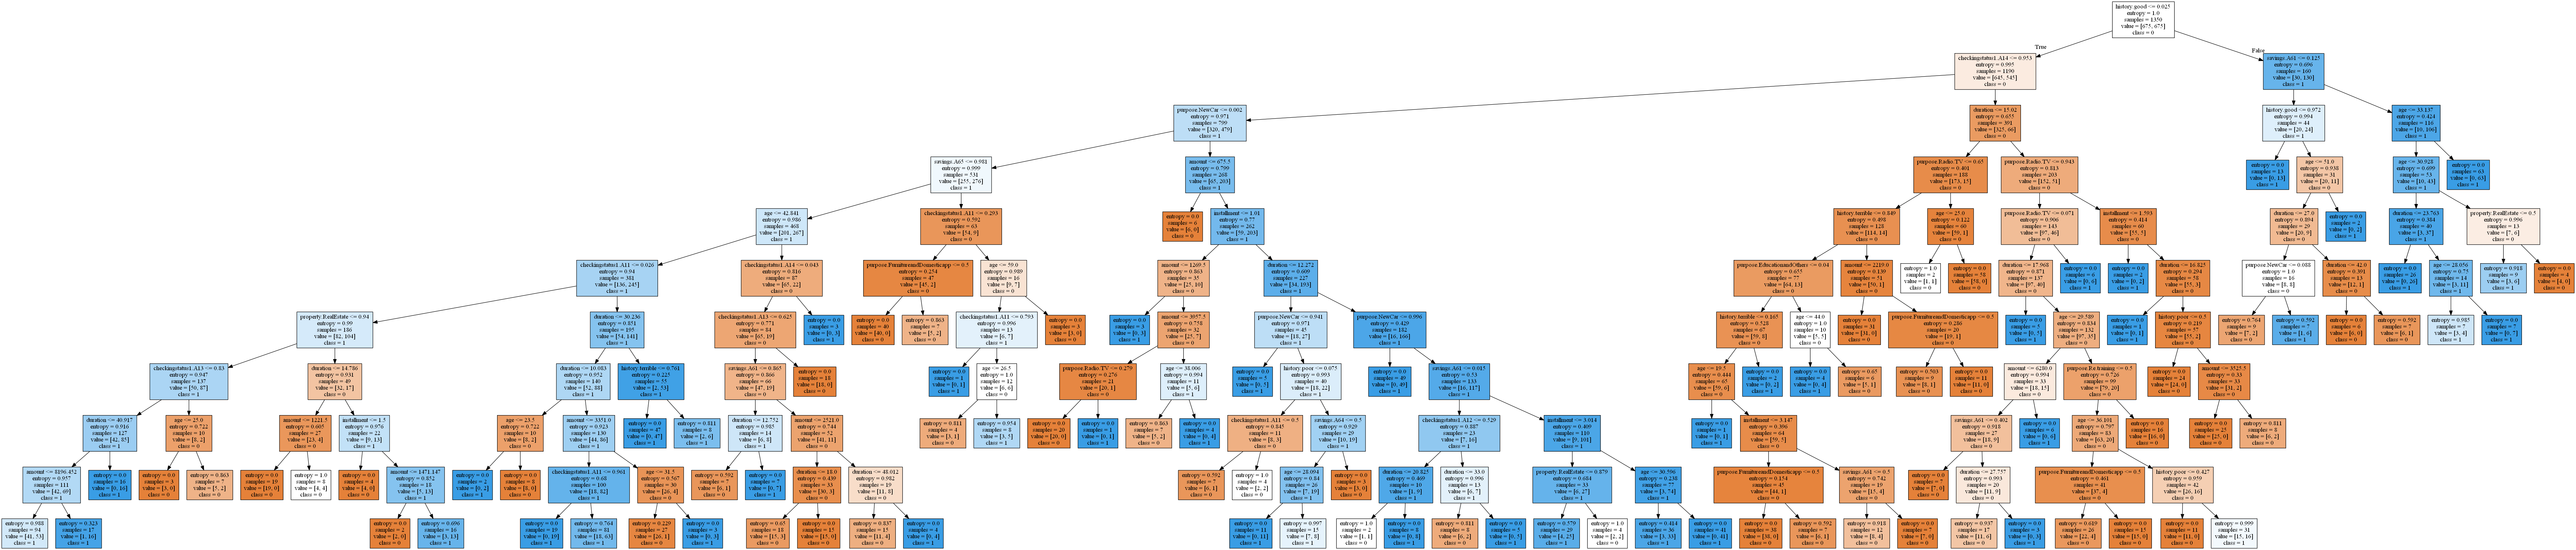

In [21]:

import pydotplus
import sklearn.tree as tree
from IPython.display import Image

dt_feature_names = list(X_test.columns)

tree.export_graphviz(clf_tree_entropy, out_file='tree.dot', 
    class_names=cn,feature_names=dt_feature_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')

Image(graph.create_png())

#### Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(Y_train, clf_tree_entropy.predict(X_train)))
print("Test confusion matrix")
print(confusion_matrix(Y_test, clf_tree_entropy.predict(X_test)))

Train confusion matrix
[[571 104]
 [ 51 624]]
Test confusion matrix
[[125  50]
 [ 31  44]]


In [23]:
print(metrics.classification_report(Y_test,tree_predict))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       175
           1       0.51      0.53      0.52        75

    accuracy                           0.70       250
   macro avg       0.65      0.66      0.65       250
weighted avg       0.71      0.70      0.71       250



#### AUC-ROC Score

In [24]:
tree_predict = clf_tree_entropy.predict(X_test)
metrics.roc_auc_score(Y_test,tree_predict)

0.6504761904761904

#### Roc Curve for test-train data

In [26]:
from sklearn.metrics import roc_curve, auc
train_fpr, train_tpr, thresholds = roc_curve(Y_train, clf_tree_entropy.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(Y_test, clf_tree_entropy.predict_proba(X_test)[:,1])

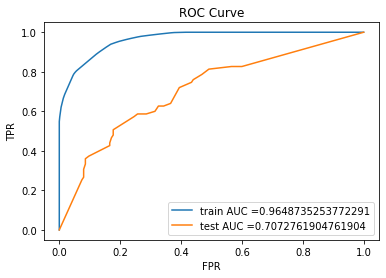

In [27]:
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

### Interpretation:


 Model built with decision tree resulted in an accurcay of 0.70, with auc score of 0.65

### Random Forest Classifier

In [19]:
data = pd.read_csv("C:\\Users\\R swetha\\Desktop\\Model Interpretation\\germancredit.csv")
data.shape

(1000, 21)

In [14]:
randomForest = ensemble.RandomForestClassifier(n_estimators=50, oob_score=True)


In [15]:
randomForest.fit(X_train,Y_train)
y_pred=randomForest.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [16]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.732


In [25]:
importances = list(zip(randomForest.feature_importances_, data.columns))
importances.sort(reverse=True)

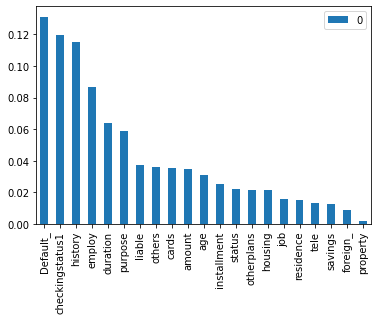

In [26]:
pd.DataFrame(importances, index=[x for (_,x) in importances]).plot(kind = 'bar')

In [41]:

# Split dataset into features and labels
X=X_train[['checkingstatus1.A11', 'checkingstatus1.A12', 'checkingstatus1.A13', 'checkingstatus1.A14', 'history.good', 'history.poor', 'history.terrible', 'purpose.Re.training', 'purpose.Used.car', 'purpose.Radio.TV', 'purpose.FurnitureandDomesticapp', 'purpose.BusinessorRepairs', 'purpose.NewCar', 'purpose.EducationandOthers','duration']]  # Removed feature "sepal length"
y=Y_train['Default_']                                       
# Split dataset into training set and test set


In [42]:
xtest=X_test[['checkingstatus1.A11', 'checkingstatus1.A12', 'checkingstatus1.A13', 'checkingstatus1.A14', 'history.good', 'history.poor', 'history.terrible', 'purpose.Re.training', 'purpose.Used.car', 'purpose.Radio.TV', 'purpose.FurnitureandDomesticapp', 'purpose.BusinessorRepairs', 'purpose.NewCar', 'purpose.EducationandOthers','duration']]  # Removed feature "sepal length"
ytest =Y_test['Default_']  

In [43]:
clf=RandomForestClassifier(n_estimators=50,oob_score=True)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X,y)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
# prediction on test set
y_pred=clf.predict(xtest)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))


Accuracy: 0.692


In [45]:
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y, clf.predict(X)))
print("Test confusion matrix")
print(confusion_matrix(ytest, clf.predict(xtest)))

Train confusion matrix
[[644  31]
 [ 55 620]]
Test confusion matrix
[[133  42]
 [ 35  40]]


In [46]:
print(metrics.classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78       175
           1       0.49      0.53      0.51        75

    accuracy                           0.69       250
   macro avg       0.64      0.65      0.64       250
weighted avg       0.70      0.69      0.70       250



In [47]:
tree_predict1 = clf.predict(xtest)
metrics.roc_auc_score(ytest,tree_predict1)

0.6466666666666667

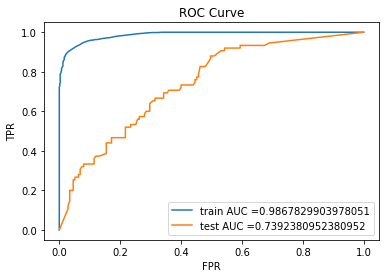

In [49]:
from sklearn.metrics import roc_curve, auc
train_fpr, train_tpr, thresholds = roc_curve(y, clf.predict_proba(X)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(ytest, clf.predict_proba(xtest)[:,1])


plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

### Interpretation:

Model with random forest has auc score of 0.64 and accuracy to be 69%